In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [2]:
minist = pd.read_excel("Ministries.xlsx")
cats = ['Economy', 
        'Environment & Nature Protection',
        'Agriculture & Nutrition', 'Mobility',
        'Climate, Energy, Transformation', 'Social Justice & Solidarity',
        'Cross-Cutting Decisions & Initiatives',
        'International Affairs & Diplomacy', 
        ]
names = pd.read_excel("Topic Summary.xlsx",skipfooter=1).fillna(0)
names = names.loc[names["#"]!=27] # not useful topic

names["topic_60"] = 'topic_'+names["#"].astype(int).astype(str)
topic_to_keep = names.topic_60.tolist()

/home/sarah/projects/nets/venv/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
## topic model data
df = pd.read_excel("MH_60_dis.xlsx")
df["month"] = df["_doc"].str.split("_").str[1].str.split("-").str[:2].str.join('-')
df["ministerium"] = df["_doc"].str.split('_').str[0]

# fix double names 
# collect both ('BMEL-BMEL', 'BMEL') and ('BMDV-BMDV', 'BMDV') in one
df["ministerium_long"] = df["ministerium"]
df["ministerium"] = df["ministerium_long"].str.split('-').str[0]

df = df.groupby(["month","ministerium"], as_index=False).sum()

In [4]:
### Define categories

In [5]:
cat_cols = {
    'Economy':'#6a51a3',
    'Environment & Nature Protection':'#c7e9c0',
    'Agriculture & Nutrition':'#41ab5d',
    'Mobility':'#fd8d3c',
    'Climate, Energy, Transformation':'#0570b0',
    'Social Justice & Solidarity':'#fb6a4a',
    'Cross-Cutting Decisions & Initiatives': '#ffeda0',
    'International Affairs & Diplomacy':'#bdbdbd',
    }

In [6]:
names["Main category"].value_counts()

International Affairs & Diplomacy        14
Climate, Energy, Transformation           9
Cross-Cutting Decisions & Initiatives     8
Economy                                   6
Mobility                                  6
Environment & Nature Protection           3
Social Justice & Solidarity               3
Agriculture & Nutrition                   3
Name: Main category, dtype: int64

In [7]:
int_c = ['#bdbdbd' for i in range(14)] # grey
cli_c = ['#0570b0' for i in range(9)]  # blue
mob_c = ['#fd8d3c' for i in range(6)]  # orange
eco_c = ['#6a51a3' for i in range(6)]  # lila
cro_c = ['#ffeda0' for i in range(8)]  # yellow
env_c = ['#c7e9c0' for i in range(3)]  # brightgreen
soc_c = ['#fb6a4a' for i in range(3)]  # red
agr_c = ['#41ab5d' for i in range(3)]  # green


colors =( 
    eco_c +
    env_c +
    agr_c +
    mob_c +
    cli_c + 
    soc_c +
    cro_c +
    int_c  
)  

order_main_cats = [
    "Economy",    
    "Environment & Nature Protection",
    "Agriculture & Nutrition",
    "Mobility",
    "Climate, Energy, Transformation",
    "Social Justice & Solidarity",
    "Cross-Cutting Decisions & Initiatives",
    "International Affairs & Diplomacy" 
]
sort = {}
for i, c in enumerate(order_main_cats):
    sort[c] = i

In [8]:
topic_names = {}
for topic in topic_to_keep:
    topic_names[topic] = names.loc[names["topic_60"]==topic,"Brief Title"].values[0]

topic_colors = {}
c = 0
names["sorter"] = names["Main category"].replace(sort)
for i, row in names.sort_values("sorter").iterrows():
    topic_colors[row["topic_60"]] = colors[c]
    c+=1

topic_to_keep = names.sort_values("sorter")["topic_60"].tolist()

In [9]:
def find_cats(row):
    ls = []
    cats = ['Economy', 'Environment & Nature Protection',
            'Agriculture & Nutrition', 'Mobility',
            'Climate, Energy, Transformation', 'Social Justice & Solidarity',
            'Cross-Cutting Decisions & Initiatives',
            'International Affairs & Diplomacy']
    for i in cats:
        if row[i] == 1 and row["Main category"]!=i:
            ls.append(cat_cols[i])
    return ls
            
names["cols_cat"] = names.apply(find_cats, axis=1)

### Plots

#### Topics over time

In [10]:
df_month = df.groupby("month").sum()[topic_to_keep]

df_month = df_month.loc[['2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09',
       '2023-10', '2023-11', '2023-12', '2024-01', '2024-02']]

51 topic_60


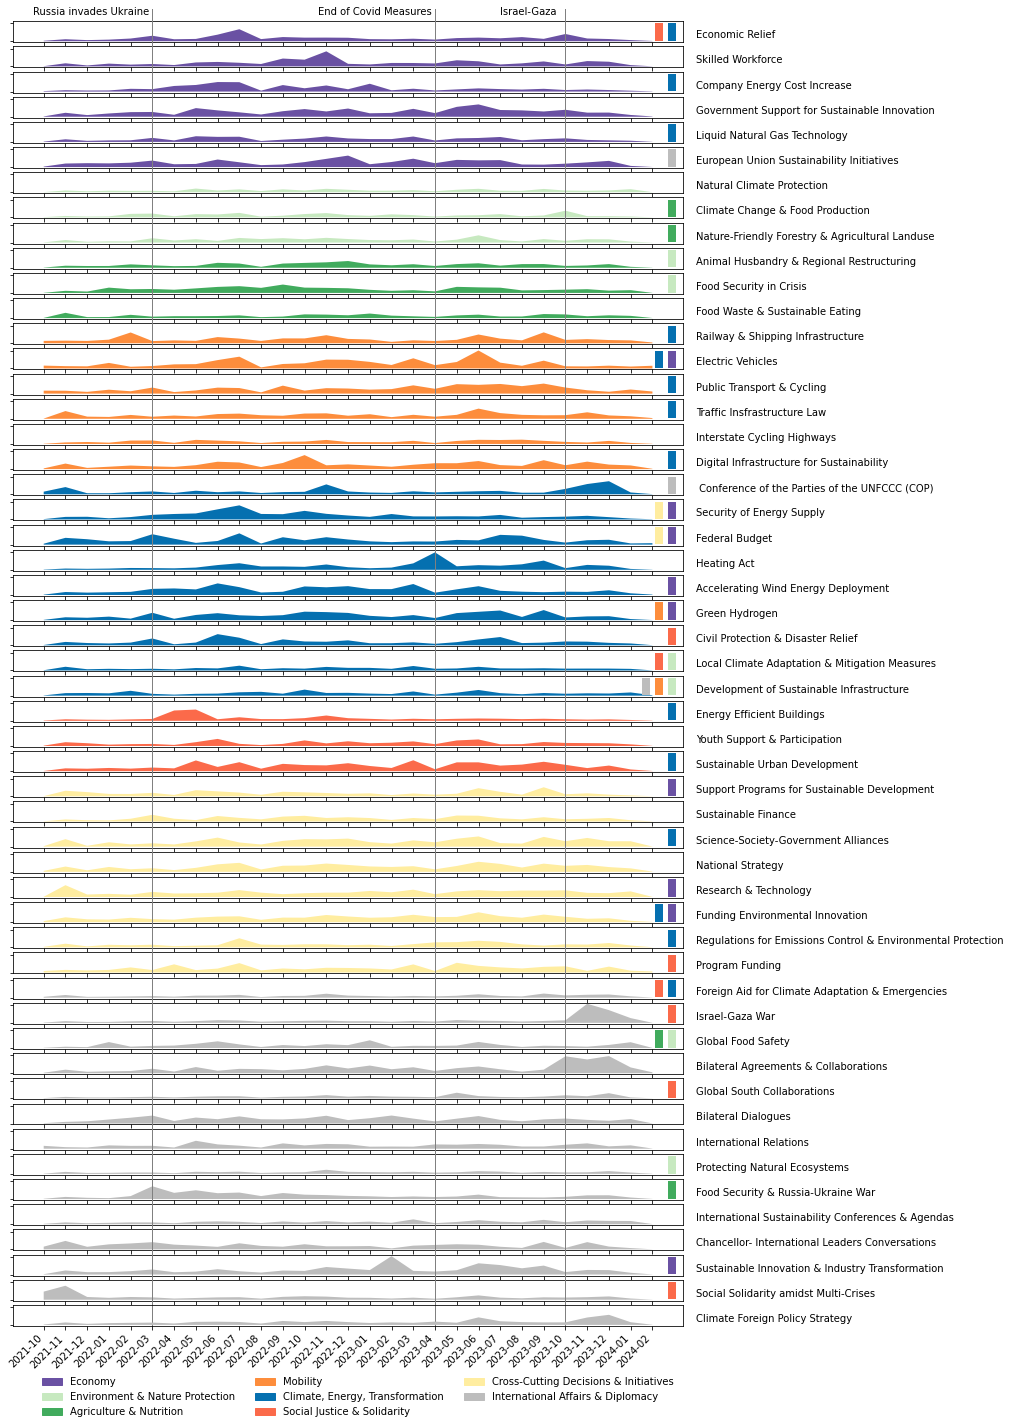

In [12]:
fig, ax = plt.subplots( len(range(len(topic_to_keep))),1,figsize=(12,24),sharex=True, sharey=True)

c = 0
for i, topic in enumerate(topic_to_keep):
    ax[i].fill_between(df_month[topic].index, 0, df_month[topic], fc=topic_colors[topic])
    ax[i].text(30,1,names.loc[names.topic_60==topic, "Brief Title"].values[0])
    _ = ax[i].set_yticks([0,5],['',''])
    
    cols_cat = names.loc[names.topic_60==topic, "cols_cat"].values[0]
    if len(cols_cat)>0:
        for j, c in enumerate(cols_cat):
            ax[i].add_artist(mpatches.Rectangle((28.7-0.6*j,0.1), width = 0.4, height=4.9, fc=c))
    
    
print(i, topic)
_=ax[i].set_xticks([i for i in range(len(df_month.index))],df_month.index,  rotation=45, ha="right")

ax[i].axvline(x=5,ymin=0,ymax=62.8, c="grey", linewidth=1,zorder=0, clip_on=False)
ax[i].text(0-0.5, len(topic_to_keep)*7+5,'Russia invades Ukraine')

ax[i].axvline(x=18,ymin=0,ymax=62.8, c="grey", linewidth=1,zorder=0, clip_on=False)
ax[i].text(12.6, len(topic_to_keep)*7+5,'End of Covid Measures')

ax[i].axvline(x=24,ymin=0,ymax=62.8, c="grey", linewidth=1,zorder=0, clip_on=False)
ax[i].text(21, len(topic_to_keep)*7+5,'Israel-Gaza')


legend_labels = []
for f in cat_cols.keys():
    legend_labels.append(mpatches.Patch(color=cat_cols[f], label=f))
plt.legend(handles=legend_labels, bbox_to_anchor=(1, -2), ncol=3, frameon=False)

plt.savefig("figures/topics_time.png", bbox_inches="tight", facecolor='white', edgecolor='none')

#### Topics per ministry

In [13]:
# sum data
df_minist = df.groupby("ministerium").sum()[topic_to_keep]

df_minist["sum"] = df_minist.apply(sum, axis=1)

top_cols = [i for i in df_minist.columns if 'topic' in i]
for c in top_cols:
    df_minist[f'{c}_rel'] = df_minist[c]/df_minist['sum']
    
df_minist["minist"] = df_minist.index
df_minist_T = df_minist.T

In [14]:
# names
minist_rename  = {}
for i,row in minist.iterrows():
    minist_rename[row["short"].split('-')[0]] = row["long"]

# party columns
minist = minist.fillna("none")
party_cols = {
    "Grüne":'green',
    "SPD":'red',
    "FDP":'y',
    "none":'black'
}
minist["party_cols"] = minist["party"].replace(party_cols)

In [155]:
tot_all

,ministry_short,all
0,AA,299
1,BMAS,351
2,BMBF,212
3,BMDV,19
4,BMEL,672
5,BMF,180
6,BMFSFJ,206
7,BMG,101
8,BMI,719
9,BMJ,175


In [145]:
# read data for total numbers of pressemitteilungen
tot = pd.read_excel("pressemeldungen/data/texts_klima/pressemeldungen_all.xlsx")
print(tot.shape)

# prepare data for plotting
tot["ministry_short"] = tot.ministry.str.split('_').str[0]
tot_all = tot.groupby(["ministry_short"],as_index=False).size().rename(columns={"size":"all"})
tot_gr = tot.groupby(["ministry_short","contains_klima"],as_index=False).size()
tot_gr = tot_gr.merge(tot_all, on="ministry_short", how="left")
tot_gr["rel"] = tot_gr["size"]/tot_gr["all"]

In [178]:
minist

,short,long_long,long,party,party_cols
0,AA-AA,Auswärtige Amt,Auswärtige Amt,Grüne,green
1,BMAS-BMAS,Bundesministerium für Arbeit und Soziales,Arbeit und Soziales,SPD,red
2,BMBF-BMBF,Bundesministerium für Bildung und Forschung,Bildung und Forschung,FDP,y
3,BMDV,Bundesministerium für Digitales und Verkehr,Digitales und Verkehr,FDP,y
4,BMDV-BMDV,Bundesministerium für Digitales und Verkehr_l,Digitales und Verkehr,FDP,y
5,BMEL,Bundesministerium für Ernährung und Landwirtsc...,Ernährung und Landwirtschaft,Grüne,green
6,BMEL-BMEL,Bundesministerium für Ernährung und Landwirtsc...,Ernährung und Landwirtschaft,Grüne,green
7,BMF-BMF,Bundesministerium für Finanzen,Finanzen,FDP,y
8,BMFSFJ-BMFSFJ,"Bundesministerium für Familie, Senioren, Fraue...","Familie, Senioren, Frauen und Jugend",Grüne,green
9,BMG-BMG,Bundesministerium für Gesundheit,Gesundheit,SPD,red


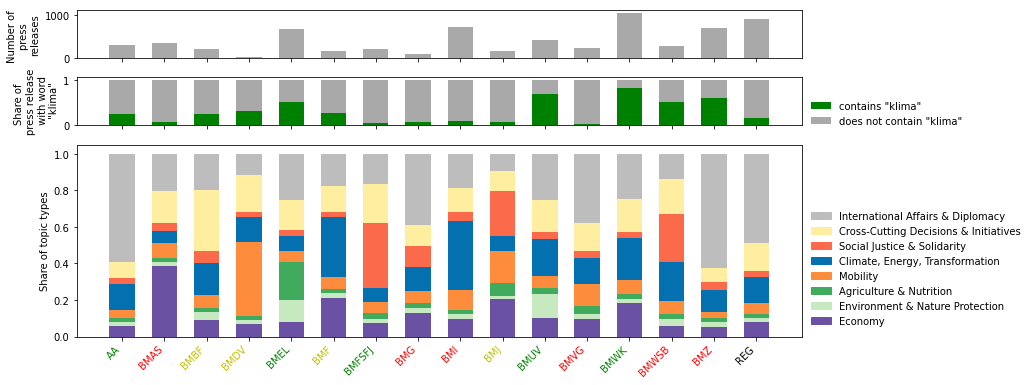

In [180]:
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

long_names = False
plot = df_minist_T
    
width=0.6

fig, ax = plt.subplots(3, figsize=(13,6), sharex=True,  gridspec_kw={'height_ratios':[1,1,4]})

#### total number of press releases
# data is in same order as df_minist_T since ministries ar ordered alphabetically
ax[0].bar(tot_all["ministry_short"], tot_all["all"], 
              width, color="darkgrey")
ax[0].set_ylabel('Number of \npress \nreleases')

#### share of press releases with klima
ax[1].bar(tot_gr.loc[tot_gr.contains_klima==1, "ministry_short"], 
          tot_gr.loc[tot_gr.contains_klima==1, "rel"], 
          width, 
          label='contains "klima"',
          color="green")
prev_values = tot_gr.loc[tot_gr.contains_klima==1, "rel"]
ax[1].bar(tot_gr.loc[tot_gr.contains_klima==0, "ministry_short"], 
          tot_gr.loc[tot_gr.contains_klima==0, "rel"], 
          width, bottom=prev_values, 
          label='does not contain "klima"',
          color="darkgrey")
ax[1].set_ylabel('Share of \npress release\n with word\n "klima"')
ax[1].legend(bbox_to_anchor=(1, 0.7), frameon=False)

#### share of topics
prev_values = np.zeros(plot.shape[1])
for i, topic in enumerate(topic_to_keep):
    ax[2].bar(plot.columns, plot.loc[f'{topic}_rel'], 
              width, bottom=prev_values, 
              label=topic,
              color=topic_colors[topic])
    prev_values = prev_values + np.array(plot.loc[f'{topic}_rel'])
ax[2].set_ylabel('Share of topic types')

if long_names:
    _=ax[2].set_xticks([i for i in range(len(plot.columns))],
                       plot.rename(columns=minist_rename).columns, 
                       rotation=45, 
                       ha='right')
else:
    _=ax[2].set_xticks([i for i in range(len(plot.columns))],plot.columns, rotation=45, ha='right')

tick_cols = minist.drop_duplicates(subset=["long"])["party_cols"].tolist()
for xtick, color in zip(ax[2].get_xticklabels(), tick_cols):
    xtick.set_color(color)


legend_labels = []
for f in reversed(list(cat_cols.keys())):
    legend_labels.append(mpatches.Patch(color=cat_cols[f], label=f))
plt.legend(handles=legend_labels, bbox_to_anchor=(1, 0.7), frameon=False)
plt.savefig("figures/topics_ministery_short_names.png", bbox_inches="tight", facecolor='white', edgecolor='none')

### Timeline for each topic and ministry

In [16]:
months=['2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09',
       '2023-10', '2023-11', '2023-12', '2024-01', '2024-02']

In [96]:
for topic in topic_to_keep:
    fig, ax = plt.subplots( len(minist.short.str.split('-').str[0].unique()),1,figsize=(9,10),sharex=True, sharey=True)
    for i, m in enumerate(minist.short.str.split('-').str[0].unique()):
        # prepare data
        part = df[df["ministerium"]==m].groupby("month").sum()
        new_index = [i for i in df_month.index if i not in part.index] 
        rest = pd.DataFrame(
                            data = [[0 for i in range(len(part.columns))] for j in range(len(new_index))], 
                            columns=part.columns, 
                            index=new_index
                           )
        part = pd.concat([part,rest])
        part = part.sort_index()
        part = part.loc[months]
        ax[i].fill_between(part.index, 0, part[topic], fc=topic_colors[topic])
        ax[i].text(30,1, 
                   minist_rename[m], 
                   color=minist.loc[minist["long"]==minist_rename[m],"party_cols"].values[0])
        _ = ax[i].set_yticks([0,2.5],['',''])
    _=ax[i].set_xticks([j for j in range(len(part.index))],part.index, ha='right', rotation=45)
    _=ax[0].set_title(names.loc[names.topic_60==topic, "Brief Title"].values[0])



    ax[i].axvline(x=5,ymin=0,ymax=20.8, c="grey", linewidth=1,zorder=0, clip_on=False)
    ax[i].text(-2.3, 52,'Russia invades Ukraine')

    ax[i].axvline(x=18,ymin=0,ymax=20.8, c="grey", linewidth=1,zorder=0, clip_on=False)
    ax[i].text(11, 52,'End of Covid Measures')

    ax[i].axvline(x=24,ymin=0,ymax=20.8, c="grey", linewidth=1,zorder=0, clip_on=False)
    ax[i].text(20, 52,'Israel-Gaza')


    plt.savefig(f"figures/single_topics/{topic}.png", bbox_inches="tight", facecolor='white', edgecolor='none')
    plt.close()

Text(20, 52, 'Israel-Gaza')

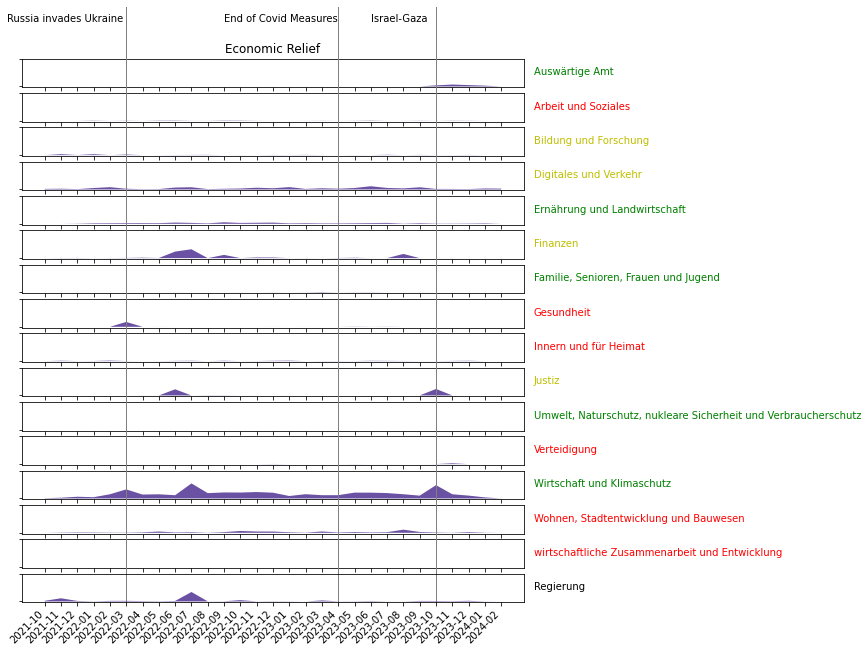

In [32]:
topic = topic_to_keep[0]
fig, ax = plt.subplots( len(minist.short.str.split('-').str[0].unique()),1,figsize=(9,10),sharex=True, sharey=True)
for i, m in enumerate(minist.short.str.split('-').str[0].unique()):
    # prepare data
    part = df[df["ministerium"]==m].groupby("month").sum()
    new_index = [i for i in df_month.index if i not in part.index] 
    rest = pd.DataFrame(
                        data = [[0 for i in range(len(part.columns))] for j in range(len(new_index))], 
                        columns=part.columns, 
                        index=new_index
                       )
    part = pd.concat([part,rest])
    part = part.sort_index()
    part = part.loc[months]
    ax[i].fill_between(part.index, 0, part[topic], fc=topic_colors[topic])
    ax[i].text(30,1, 
               minist_rename[m], 
               color=minist.loc[minist["long"]==minist_rename[m],"party_cols"].values[0])
    _ = ax[i].set_yticks([0,2.5],['',''])
_=ax[i].set_xticks([j for j in range(len(part.index))],part.index, ha='right', rotation=45)
_=ax[0].set_title(names.loc[names.topic_60==topic, "Brief Title"].values[0])



ax[i].axvline(x=5,ymin=0,ymax=20.8, c="grey", linewidth=1,zorder=0, clip_on=False)
ax[i].text(-2.3, 52,'Russia invades Ukraine')

ax[i].axvline(x=18,ymin=0,ymax=20.8, c="grey", linewidth=1,zorder=0, clip_on=False)
ax[i].text(11, 52,'End of Covid Measures')

ax[i].axvline(x=24,ymin=0,ymax=20.8, c="grey", linewidth=1,zorder=0, clip_on=False)
ax[i].text(20, 52,'Israel-Gaza')


### Correlation for each topic and all together

In [112]:
import seaborn as sns
corr_topics = []

cols = []
for m in corr.index:
    cols.append(minist.loc[minist.long==m,"party_cols"].values[0])

for topic in topic_names.keys():
    
    hm_1topic = []
    for i, m in enumerate(ministeries):
        # prepare data
        part = df[df["ministerium"]==m].groupby("month").sum()
        new_index = [i for i in df_month.index if i not in part.index] 
        rest = pd.DataFrame(
                            data = [[0 for i in range(len(part.columns))] for j in range(len(new_index))], 
                            columns=part.columns, 
                            index=new_index
                           )
        part = pd.concat([part,rest])
        part = part.sort_index()
        part = part.loc[months]
        hm_1topic.append(pd.DataFrame(columns=part.index, data=[part[topic]], index=[minist_rename[m]]))
        
    corr = (pd.concat(hm_1topic)).T.corr()
    corr_topics.append(corr)

In [113]:
# plots for each topic
for i, topic in enumerate(topic_names.keys()):
    fig, ax = plt.subplots()
    ax = sns.heatmap(corr_topics[i], cmap='vlag', vmin=-0.6, vmax=0.6,)

    for xtick, color in zip(ax.get_xticklabels(), cols):
        xtick.set_color(color)
        #xtick.set_rotation(45)
    for ytick, color in zip(ax.get_yticklabels(), cols):
        ytick.set_color(color)

    ax.set_title(names.loc[names.topic_60==topic, "Brief Title"].values[0])
    fig.savefig(
        f'figures/single_topics/{topic}_heatmap.png', bbox_inches="tight", facecolor='white', edgecolor='none'
    )
    plt.close()


In [116]:
# calculate total correlation by summarising correlations

# initialize
corr = corr_topics[0].fillna(0)-corr_topics[0].fillna(0)
for c in corr_topics:
    corr += c.fillna(0)
    
corr = corr/len(corr_topics)

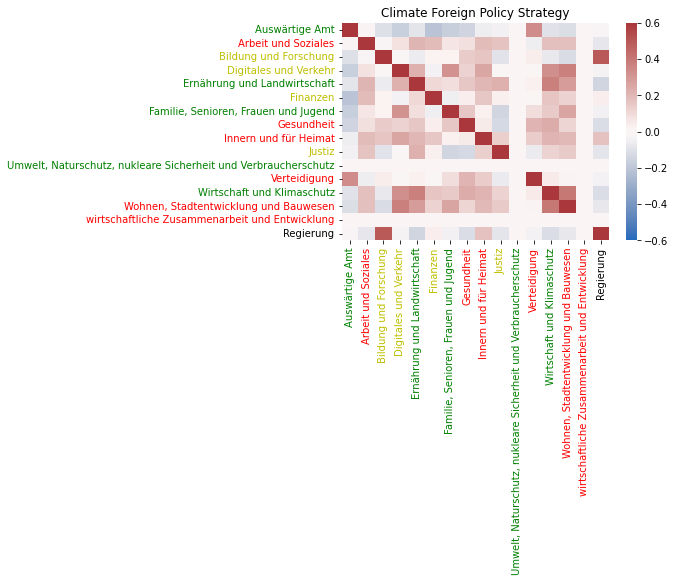

In [119]:
# plot for total correlation
ax = sns.heatmap(corr, cmap='vlag', vmin=-0.6, vmax=0.6,)

for xtick, color in zip(ax.get_xticklabels(), cols):
    xtick.set_color(color)
for ytick, color in zip(ax.get_yticklabels(), cols):
    ytick.set_color(color)

ax.set_title(names.loc[names.topic_60==topic, "Brief Title"].values[0])
fig.savefig(
    f'figures/correlation_btw_ministries.png', bbox_inches="tight", facecolor='white', edgecolor='none'
)